# Data Science Internship

# Task1 - Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## 2. Reading and Understanding the Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## checking for missing values

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

> NO missing values present

In [6]:
n = len(df[df['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [7]:
n1 = len(df[df['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [8]:
n2 = len(df[df['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


## 3. EDA

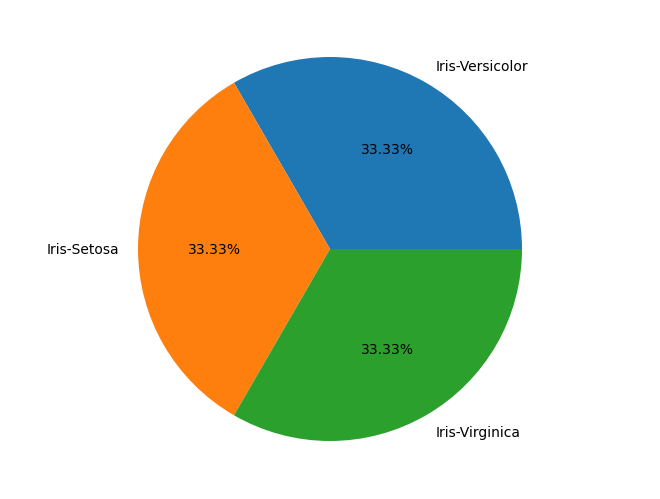

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

## Checking for Outliers

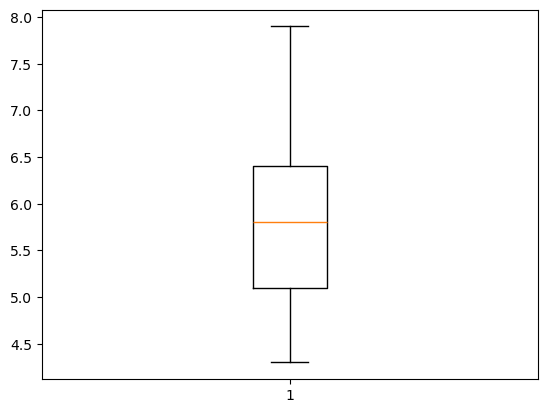

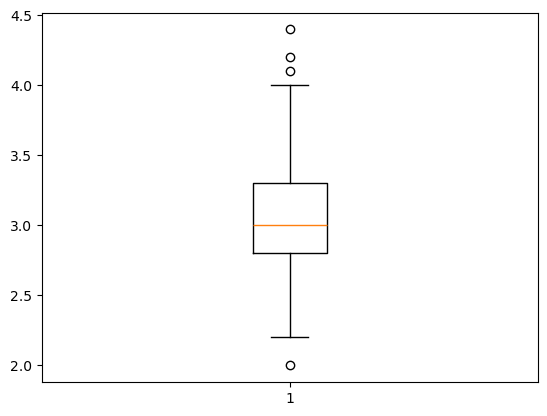

In [10]:
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

> No Outliers

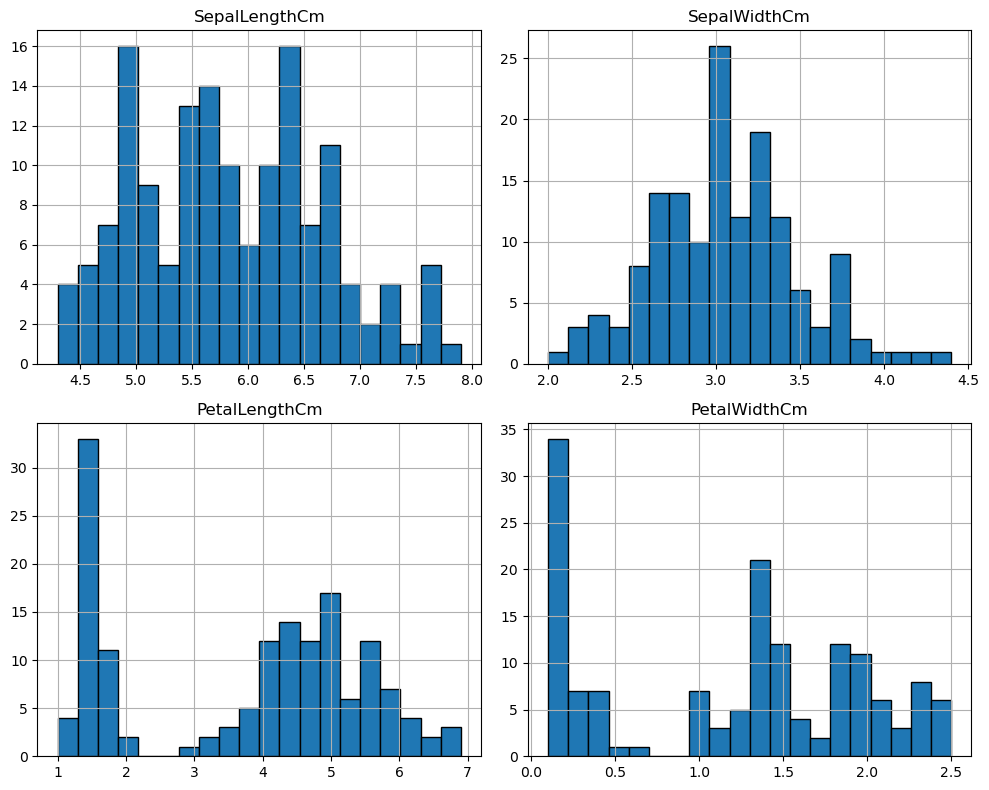

In [11]:
df = df.drop(columns='Id')

# Plot histograms for each column
df.hist(figsize=(10, 8), bins=20, edgecolor='black')

# Show the plots
plt.tight_layout()
plt.show()

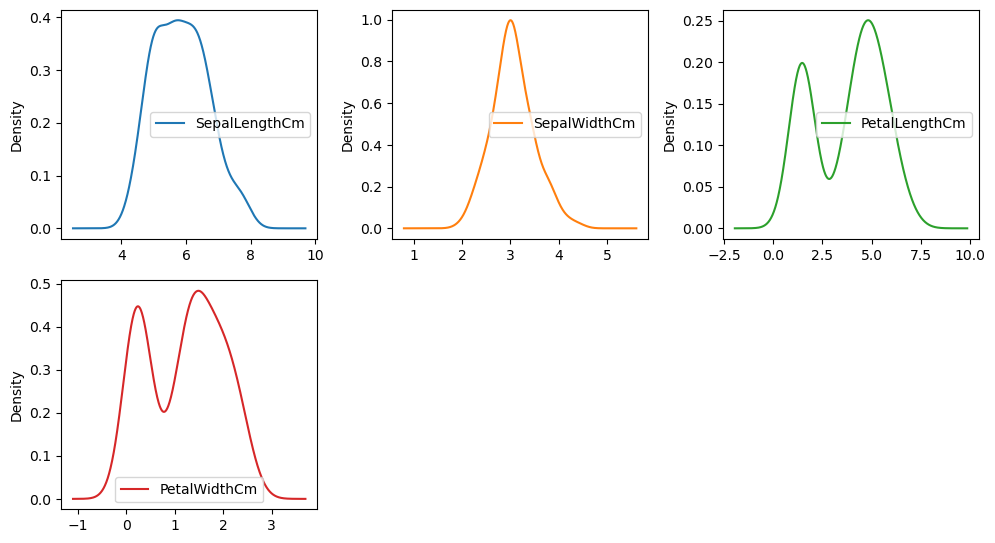

In [12]:
# Plot density plots for each column
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 8))

# Show the plots
plt.tight_layout()
plt.show()

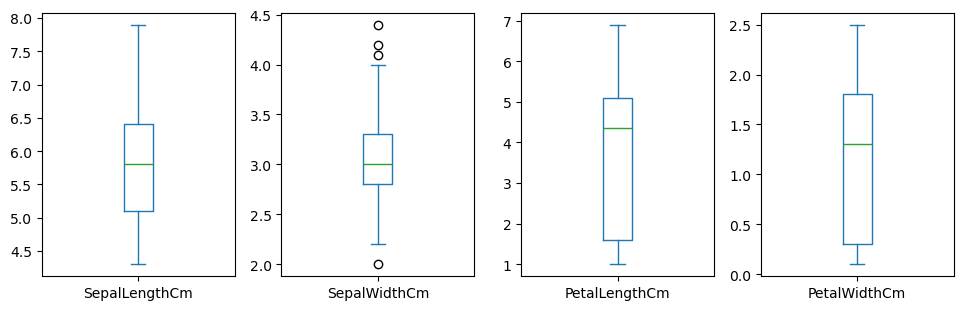

In [13]:
# Plot box plots for each column
df.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, figsize=(12, 6))

# Show the plots
plt.tight_layout()
plt.show()

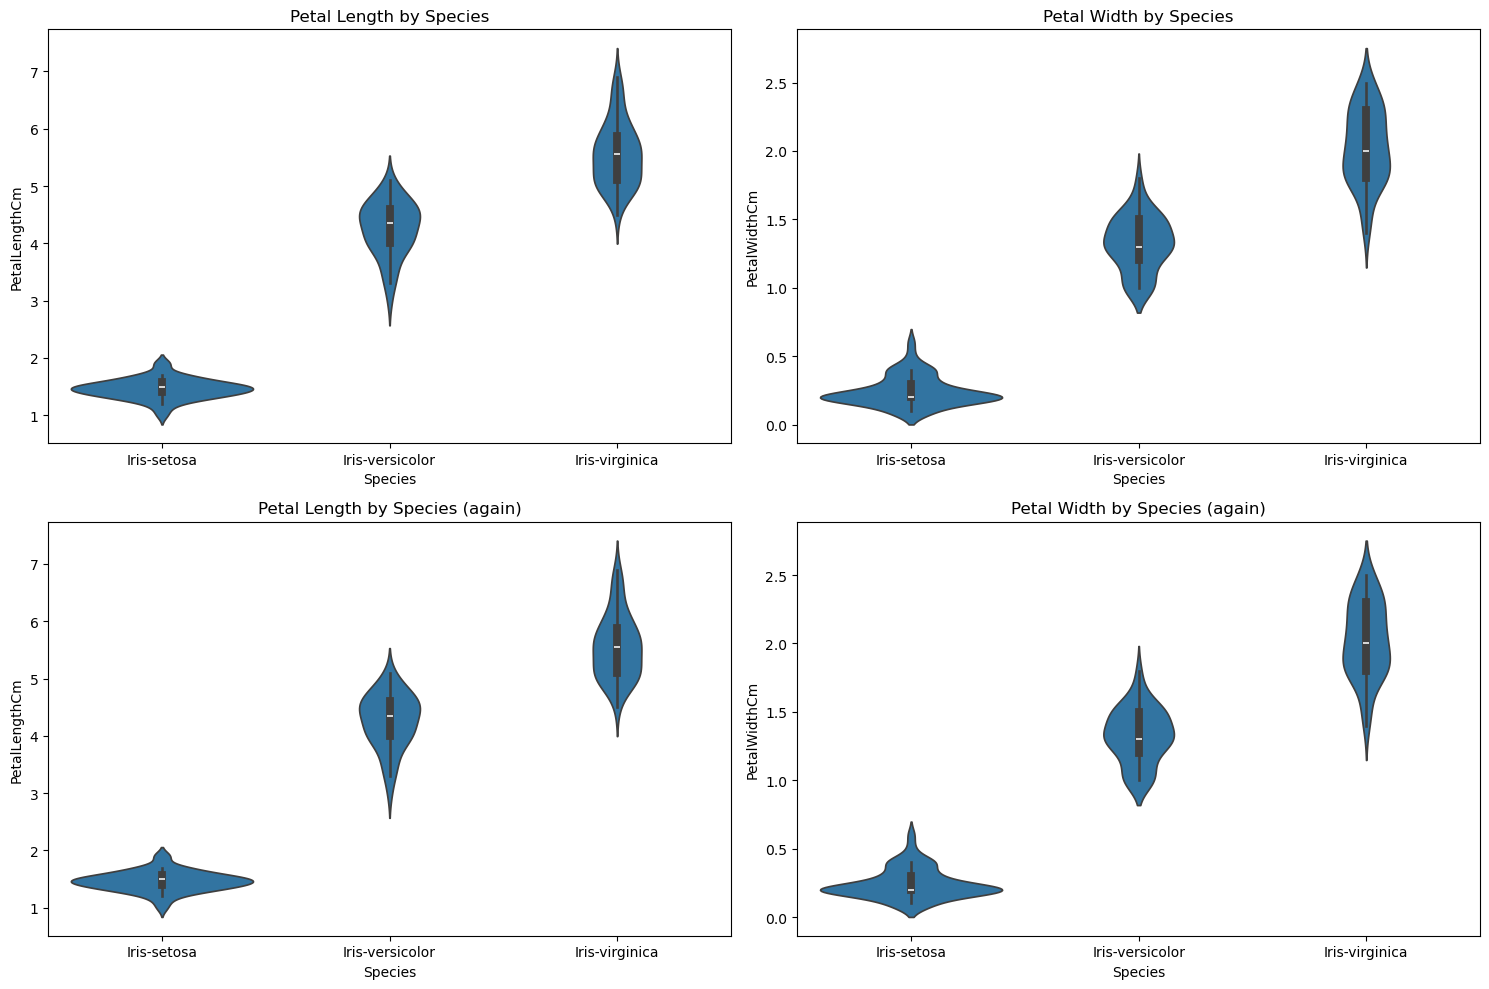

In [14]:
plt.figure(figsize=(15, 10))

# Plot violin plot for 'petal_length' by 'species'
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species')

# Plot violin plot for 'petal_width' by 'species'
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species')

# Optionally, you can use the same plots again or add new ones. Here I’m adding another example for demonstration.
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species (again)')

plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species (again)')

# Show the plots
plt.tight_layout()
plt.show()

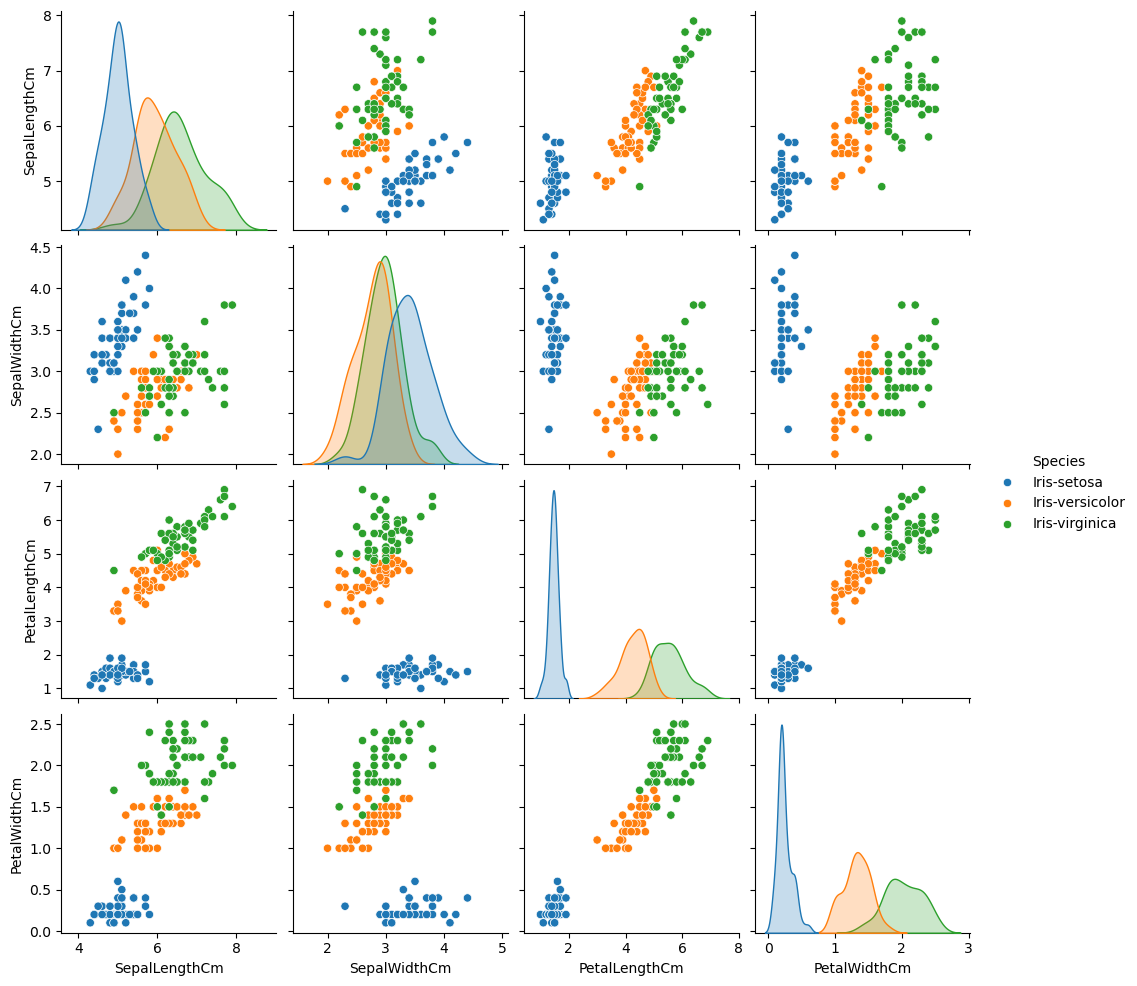

In [15]:
sns.pairplot(df,hue='Species');

## Scatter Plot for Sepal Length vs. Sepal Width by Species

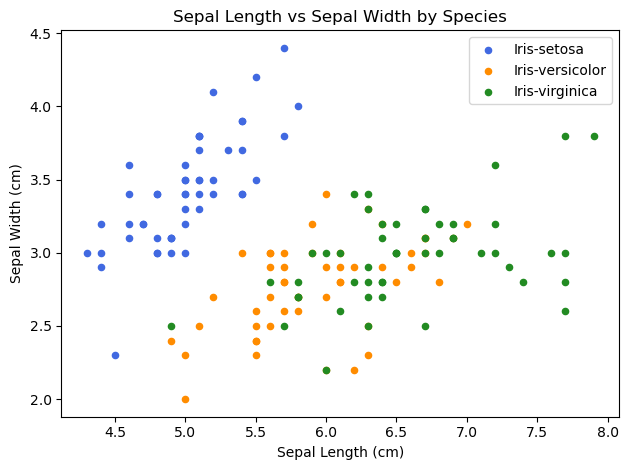

In [16]:
# Create scatter plots for each species on the same figure
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', 
                                               x='SepalLengthCm', 
                                               y='SepalWidthCm', 
                                               color='royalblue', 
                                               label='Iris-setosa')

df[df.Species == 'Iris-versicolor'].plot(kind='scatter', 
                                             x='SepalLengthCm', 
                                             y='SepalWidthCm', 
                                             color='darkorange', 
                                             label='Iris-versicolor', 
                                             ax=fig)

df[df.Species == 'Iris-virginica'].plot(kind='scatter', 
                                            x='SepalLengthCm', 
                                            y='SepalWidthCm', 
                                            color='forestgreen', 
                                            label='Iris-virginica', 
                                            ax=fig)

# Set axis labels and title
fig.set_xlabel('Sepal Length (cm)')
fig.set_ylabel('Sepal Width (cm)')
fig.set_title('Sepal Length vs Sepal Width by Species')

# Show the plot
plt.tight_layout()
plt.show()

## Scatter Plot for Petal Length vs. Petal Width by Species

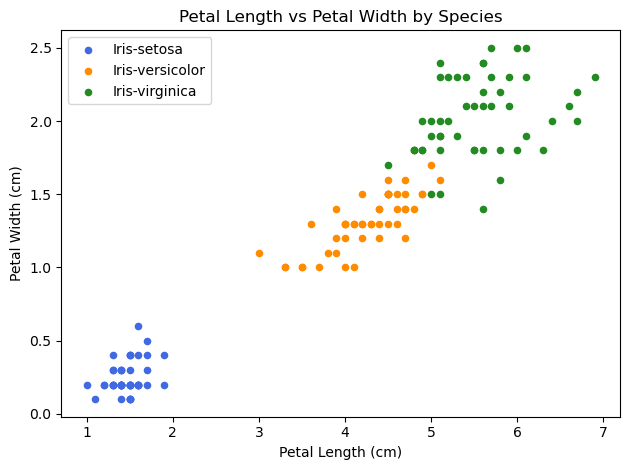

In [17]:
# Create scatter plots for each species on the same figure
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', 
                                               x='PetalLengthCm', 
                                               y='PetalWidthCm', 
                                               color='royalblue', 
                                               label='Iris-setosa')

df[df.Species == 'Iris-versicolor'].plot(kind='scatter', 
                                             x='PetalLengthCm', 
                                             y='PetalWidthCm', 
                                             color='darkorange', 
                                             label='Iris-versicolor', 
                                             ax=fig)

df[df.Species == 'Iris-virginica'].plot(kind='scatter', 
                                            x='PetalLengthCm', 
                                            y='PetalWidthCm', 
                                            color='forestgreen', 
                                            label='Iris-virginica', 
                                            ax=fig)

# Set axis labels and title
fig.set_xlabel('Petal Length (cm)')
fig.set_ylabel('Petal Width (cm)')
fig.set_title('Petal Length vs Petal Width by Species')

# Show the plot
plt.tight_layout()
plt.show()

## 4. Model Building

In [18]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

# Evaluating the Algorithm 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


## SVM 

In [20]:
from sklearn import svm
classifier1 = svm.SVC()
classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred1))  
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test,y_pred1))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train,y_train)
y_pred2 = classifier2.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test,y_pred2))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


## K-Neighbour

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(X_train,y_train)
y_pred3 = classifier3.predict(X_test)

# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred3))  
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test,y_pred3))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


## 5. Creating Petals And Sepals Training Data

In [23]:
petal=df[['PetalLengthCm','PetalWidthCm','Species']]
sepal=df[['SepalLengthCm','SepalWidthCm','Species']]

In [24]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [25]:
from sklearn import metrics 
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [26]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [27]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [28]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


> Observations:

Using Petals over Sepal for training the data gives a much better accuracy.